# Modules

In [1]:
import os
import numpy as np

import tensorflow as tf

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Reshape, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt

# Versions

In [2]:
print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
gpu_status = ""
if tf.config.list_physical_devices("GPU"):
    gpu_status = "available"
else: 
    gpu_status = "NOT AVAILABLE"
print("GPU is", gpu_status)

Version:  2.4.0-rc0
Eager mode:  True
GPU is NOT AVAILABLE


# Load data

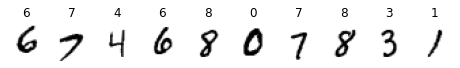

In [8]:
(x_train, y_train), (x_vali, y_vali) = mnist.load_data()
# set brightness ranging from 0 to 1.
x_train, x_vali = x_train / 255.0, x_vali / 255.0 

img_size = 28
begin = 90
end = 100
fig, axes = plt.subplots(
    1, 
    end - begin, 
    figsize = ((end-begin)*0.8, 4),
    #dpi = 300,
)
for i, img in enumerate(x_train[begin:end]):
    axes[i].imshow(img, cmap='binary', )
    axes[i].axis('off')
    axes[i].set_title(y_train[begin+i])
plt.show()

# Model

In [4]:
def getD():
    img = Input((img_size, img_size))
    m = tf.keras.layers.Reshape(
        (img_size, img_size, 1)
    )(img)
    m = Flatten()(m)
    m = Dense(128, activation = 'relu')(m)
    m = Dense(64, activation = 'relu')(m)
    out = Dense(10, activation = 'softmax')(m)
    model = tf.keras.Model(
        img,
        out,
    )
    return model

# Optimization

In [5]:
mleD = getD()
mleD.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy'],
)
mleD.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_______________________________________________________

In [20]:
mleD.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy'],
)
output = mleD.evaluate(x_vali, y_vali, verbose = 3)
print(f'loss:{output[0]:.4f}, metric:{output[1]:.4f}')

loss:0.1098, metric:0.9740


In [17]:
mleD.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(),
    metrics=['sparse_categorical_crossentropy'],
)
output = mleD.evaluate(x_vali, y_vali, verbose = 3)
print(f'loss:{output[0]:.4f}, metric:{output[1]:.4f}')

loss:2.3323, metric:2.3323


In [22]:
mleD.fit(
    x_train,
    y_train,
    batch_size = 128,
    epochs = 300,
    shuffle = True,
    validation_data = (x_vali, y_vali),
    verbose = 2,
    callbacks = [
        ModelCheckpoint(
            f'20210726_mnist/mleD.h5',
            save_best_only=True,
            monitor = 'val_loss',
        ),
        EarlyStopping(monitor='val_loss', patience = 5),
    ]
)

Epoch 1/300
469/469 - 0s - loss: 0.3539 - accuracy: 0.8984 - val_loss: 0.2043 - val_accuracy: 0.9389
Epoch 2/300
469/469 - 0s - loss: 0.1705 - accuracy: 0.9506 - val_loss: 0.1417 - val_accuracy: 0.9576
Epoch 3/300
469/469 - 0s - loss: 0.1269 - accuracy: 0.9631 - val_loss: 0.1191 - val_accuracy: 0.9640
Epoch 4/300
469/469 - 0s - loss: 0.0995 - accuracy: 0.9703 - val_loss: 0.1062 - val_accuracy: 0.9666
Epoch 5/300
469/469 - 0s - loss: 0.0838 - accuracy: 0.9745 - val_loss: 0.0947 - val_accuracy: 0.9703
Epoch 6/300
469/469 - 0s - loss: 0.0716 - accuracy: 0.9782 - val_loss: 0.0945 - val_accuracy: 0.9702
Epoch 7/300
469/469 - 0s - loss: 0.0596 - accuracy: 0.9813 - val_loss: 0.0874 - val_accuracy: 0.9728
Epoch 8/300
469/469 - 0s - loss: 0.0522 - accuracy: 0.9834 - val_loss: 0.0928 - val_accuracy: 0.9715
Epoch 9/300
469/469 - 0s - loss: 0.0455 - accuracy: 0.9853 - val_loss: 0.0929 - val_accuracy: 0.9727
Epoch 10/300
469/469 - 0s - loss: 0.0395 - accuracy: 0.9876 - val_loss: 0.0834 - val_accura

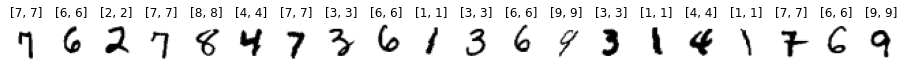

In [9]:
begin = 80
end = 100
fig, axes = plt.subplots(
    1, 
    end - begin, 
    figsize = ((end-begin)*0.8, 4))
y_pred = mleD(x_vali[begin:end])
y_maxout = np.argmax(y_pred, axis = 1)
for i, img in enumerate(x_vali[begin:end]):
    axes[i].imshow(img, cmap='binary', )
    axes[i].axis('off')
    # [vali: pred]
    axes[i].set_title(
        f'[{y_vali[begin+i]}, {y_maxout[i]}]'
    )
plt.show()